In [2]:
%cd /content/drive/MyDrive/3 eme/Vision/project

/content/drive/MyDrive/3 eme/Vision/project


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Dense, ReLU
from tensorflow.keras.layers import Embedding, BatchNormalization, Concatenate
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.models import Sequential, Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [5]:
df = pd.read_csv("train.txt",
                 delimiter=';', header=None, names=['sentence','label'])

val_df = pd.read_csv("val.txt",
                 delimiter=';', header=None, names=['sentence','label'])

ts_df = pd.read_csv("test.txt",
                 delimiter=';', header=None, names=['sentence','label'])

In [46]:
df

,sentence,label
0,i feel quite lucky to have stumbled upon it,joy
1,i remember feeling acutely distressed for a fe...,fear
2,i feel the need to tell you that phone calls d...,joy
3,i feel that spitting on somebody is the most v...,anger
4,i feel a little awkward about this but im goin...,sadness
...,...,...
8491,i am feeling a bit strange never felt that eve...,fear
8492,i feel like a mollusk repeatedly beaten with a...,sadness
8493,i feel like a stubborn year old,anger
8494,i posted this lovely picture on instagram and ...,anger


In [48]:
df['label'].unique()

array(['joy', 'fear', 'anger', 'sadness'], dtype=object)

In [49]:
df.label.value_counts()

,count
label,
joy,2200
sadness,2200
anger,2159
fear,1937


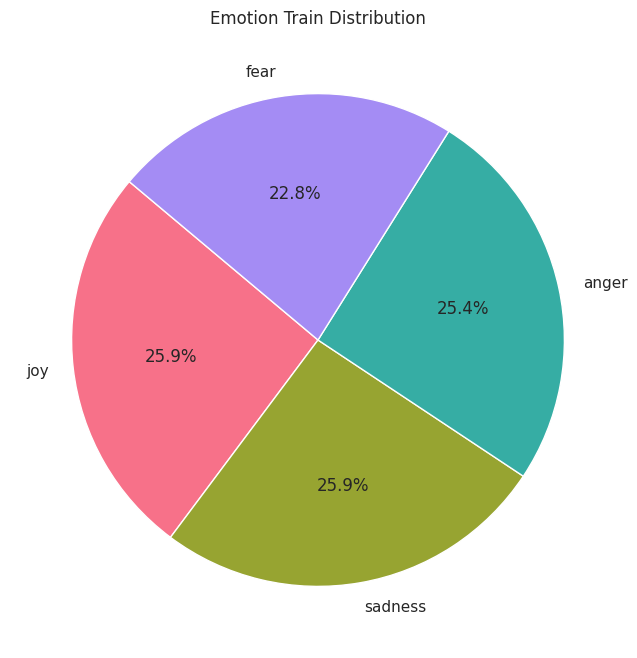

In [50]:
# Count label distributions
label_counts = df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

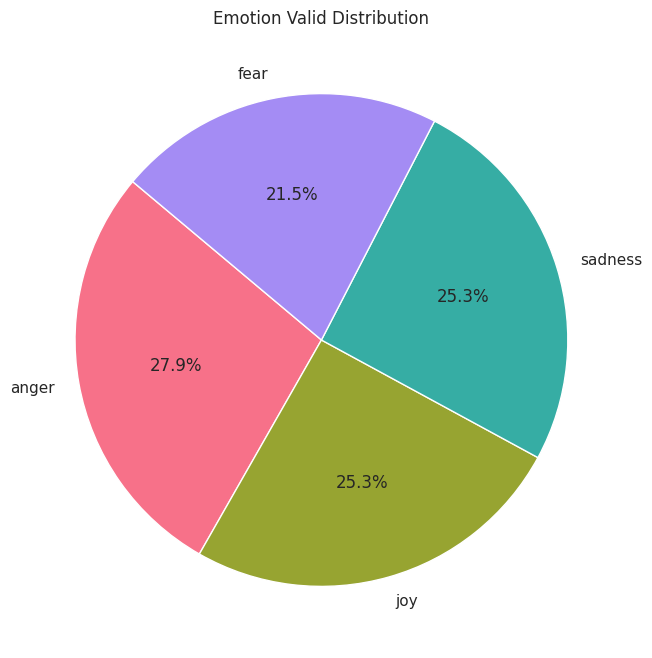

In [51]:
label_counts = val_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Valid Distribution')
plt.show()

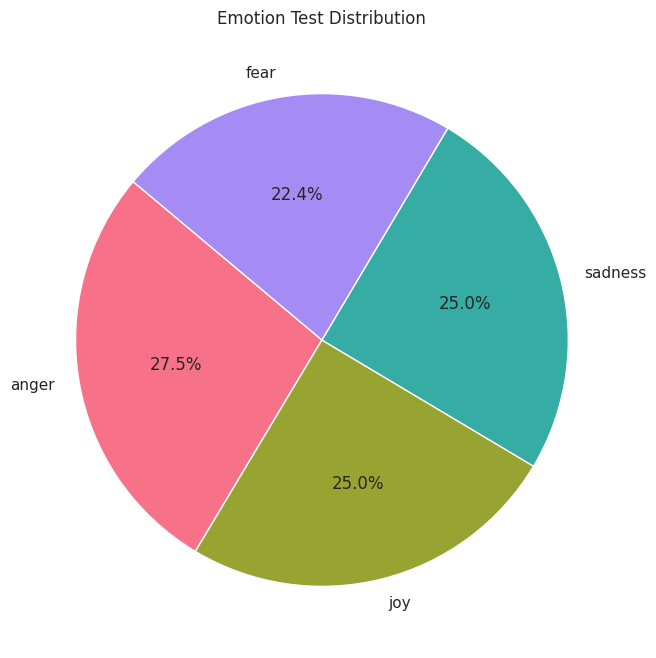

In [52]:
# Count label distributions
label_counts = ts_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Test Distribution')
plt.show()

In [53]:
df = df[~df['label'].str.contains('love')]
df = df[~df['label'].str.contains('surprise')]

In [54]:
joy = df[df['label'] == 'joy'].sample(n=2200, random_state=20)
sad = df[df['label'] == 'sadness'].sample(n=2200, random_state=20)
fear = df[df['label'] == 'fear'].sample(n=1937, random_state=20)
anger = df[df['label'] == 'anger'].sample(n=2159, random_state=20)

df_sampled = pd.concat([joy, sad, fear, anger])

df = df_sampled.sample(frac=1, random_state=20).reset_index(drop=True)

In [55]:
df.label.value_counts()

,count
label,
joy,2200
sadness,2200
anger,2159
fear,1937


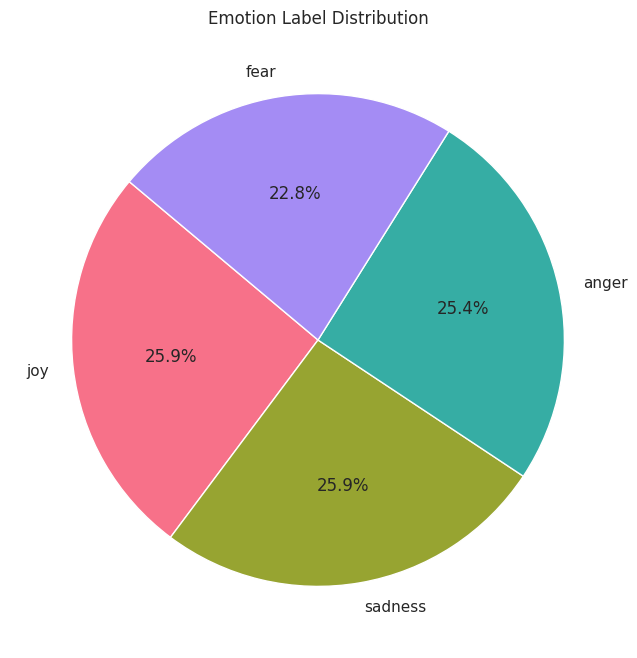

In [56]:
# Count label distributions
label_counts = df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Label Distribution')
plt.show()

In [57]:
val_df.label.value_counts()

,count
label,
anger,275
joy,250
sadness,250
fear,212


In [58]:
val_df = val_df[~val_df['label'].str.contains('love')]
val_df = val_df[~val_df['label'].str.contains('surprise')]

In [59]:
joy = val_df[val_df['label'] == 'joy'].sample(n=250, random_state=20)
sad = val_df[val_df['label'] == 'sadness'].sample(n=250, random_state=20)
fear = val_df[val_df['label'] == 'fear'].sample(n=212, random_state=20)
anger = val_df[val_df['label'] == 'anger'].sample(n=275, random_state=20)

df_sampled = pd.concat([joy, sad, fear, anger])

val_df = df_sampled.sample(frac=1, random_state=20).reset_index(drop=True)

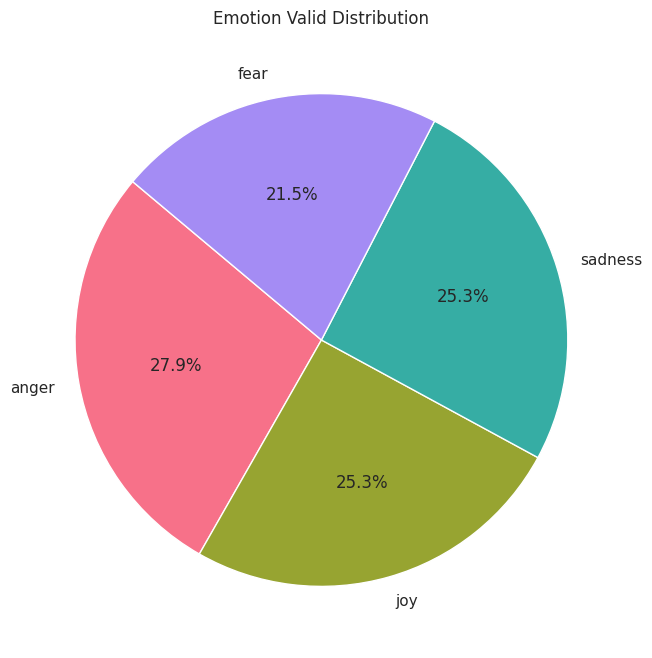

In [60]:
# Count label distributions
label_counts = val_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Valid Distribution')
plt.show()

In [61]:
ts_df.label.value_counts()

,count
label,
anger,275
joy,250
sadness,250
fear,224


In [62]:
ts_df = ts_df[~ts_df['label'].str.contains('love')]
ts_df = ts_df[~ts_df['label'].str.contains('surprise')]

In [63]:
joy = ts_df[ts_df['label'] == 'joy'].sample(n=250, random_state=20)
sad = ts_df[ts_df['label'] == 'sadness'].sample(n=250, random_state=20)
fear = ts_df[ts_df['label'] == 'fear'].sample(n=224, random_state=20)
anger = ts_df[ts_df['label'] == 'anger'].sample(n=275, random_state=20)

df_sampled = pd.concat([joy, sad, fear, anger])

ts_df = df_sampled.sample(frac=1, random_state=20).reset_index(drop=True)

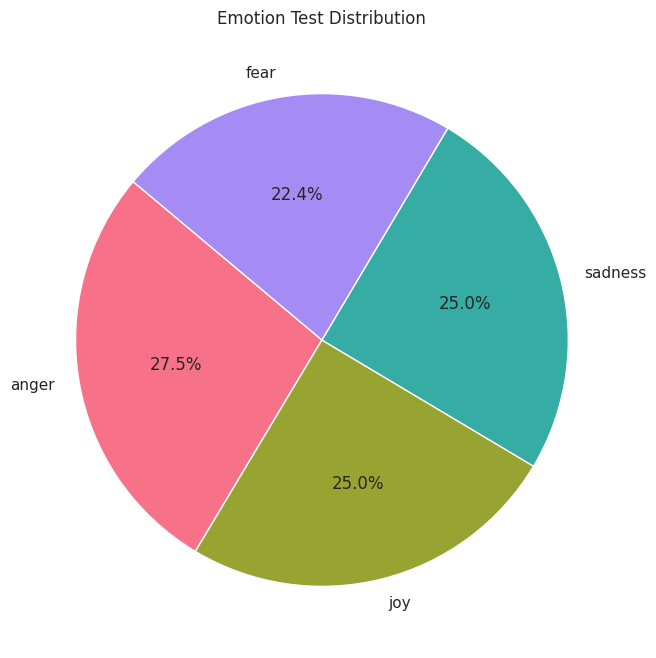

In [64]:
# Count label distributions
label_counts = ts_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Test Distribution')
plt.show()

In [65]:
tr_text = df['sentence']
tr_label = df['label']

val_text = val_df['sentence']
val_label = val_df['label']

ts_text = ts_df['sentence']
ts_label = ts_df['label']

In [66]:
encoder = LabelEncoder()
tr_label = encoder.fit_transform(tr_label)
val_label = encoder.transform(val_label)
ts_label = encoder.transform(ts_label)

In [67]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(tr_text)

sequences = tokenizer.texts_to_sequences(tr_text)

tr_x = pad_sequences(sequences, maxlen=50)
tr_y = to_categorical(tr_label)

sequences = tokenizer.texts_to_sequences(val_text)
val_x = pad_sequences(sequences, maxlen=50)
val_y = to_categorical(val_label)

sequences = tokenizer.texts_to_sequences(ts_text)
ts_x = pad_sequences(sequences, maxlen=50)
ts_y = to_categorical(ts_label)

In [68]:
max_words = 10000
max_len = 50
embedding_dim = 32

In [69]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Conv1D, BatchNormalization, ReLU, Dropout, GlobalMaxPooling1D, Dense, Concatenate, Input

# Define input layers
branch1_input = Input(shape=(max_len,))
branch2_input = Input(shape=(max_len,))

# Branch 1
branch1 = Embedding(max_words, embedding_dim, input_length=max_len)(branch1_input)
branch1 = Conv1D(64, 3, padding='same', activation='relu')(branch1)
branch1 = BatchNormalization()(branch1)
branch1 = ReLU()(branch1)
branch1 = Dropout(0.5)(branch1)
branch1 = GlobalMaxPooling1D()(branch1)

# Branch 2
branch2 = Embedding(max_words, embedding_dim, input_length=max_len)(branch2_input)
branch2 = Conv1D(64, 3, padding='same', activation='relu')(branch2)
branch2 = BatchNormalization()(branch2)
branch2 = ReLU()(branch2)
branch2 = Dropout(0.5)(branch2)
branch2 = GlobalMaxPooling1D()(branch2)

# Concatenate both branches
concatenated = Concatenate()([branch1, branch2])

# Hidden layer and output
hid_layer = Dense(128, activation='relu')(concatenated)
dropout = Dropout(0.3)(hid_layer)
output_layer = Dense(4, activation='softmax')(dropout)

# Create the model
model = Model(inputs=[branch1_input, branch2_input], outputs=output_layer)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 50, 32)         │        320,000 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 50, 32)         │        320,000 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 50, 64)         │          6,208 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 50, 64)         │          6,208 │ embedding_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 50, 64)         │            256 │ conv1d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 50, 64)         │            256 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 50, 64)         │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_3 (ReLU)            │ (None, 50, 64)         │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 50, 64)         │              0 │ re_lu_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 50, 64)         │              0 │ re_lu_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_2    │ (None, 64)             │              0 │ dropout_3[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_3    │ (None, 64)             │              0 │ dropout_4[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 128)            │              0 │ global_max_pooling1d_… │
│ (Concatenate)             │                        │                │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │         16,512 │ concatenate_1[0][0]    │
├──────────────────────

 Total params: 669,956 (2.56 MB)

 Trainable params: 669,700 (2.55 MB)

 Non-trainable params: 256 (1.00 KB)

In [70]:
batch_size = 256
epochs = 25
history = model.fit([tr_x, tr_x], tr_y, epochs=epochs, batch_size=batch_size,
                    validation_data=([val_x, val_x], val_y))

ValueError: You must call `compile()` before using the model.

In [71]:
(loss, accuracy, percision, recall) = model.evaluate([tr_x, tr_x], tr_y)
print(f'Loss: {round(loss, 2)}, Accuracy: {round(accuracy, 2)}, Precision: {round(percision, 2)}, Recall: {round(recall, 2)}')

ValueError: You must call `compile()` before using the model.

In [72]:
(loss, accuracy, percision, recall) = model.evaluate([ts_x, ts_x], ts_y)
print(f'Loss: {round(loss, 2)}, Accuracy: {round(accuracy, 2)}, Precision: {round(percision, 2)}, Recall: {round(recall, 2)}')

ValueError: You must call `compile()` before using the model.

In [73]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1'])

In [41]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
tr_per = history.history['precision']
tr_recall = history.history['recall']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_per = history.history['val_precision']
val_recall = history.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]
Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

KeyError: 'precision'

In [74]:
y_true=[]
for i in range(len(ts_y)):

    x = np.argmax(ts_y[i])
    y_true.append(x)

In [75]:
preds = model.predict([ts_x, ts_x])
y_pred = np.argmax(preds, axis=1)
y_pred

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([0, 2, 3, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 0, 3, 0, 2, 2, 3, 2, 3, 3,
       2, 0, 3, 3, 2, 2, 3, 0, 3, 2, 3, 3, 2, 0, 0, 0, 2, 2, 0, 0, 3, 0,
       2, 0, 3, 2, 0, 2, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 2, 0, 3, 3, 3, 3,
       3, 2, 0, 0, 0, 2, 0, 2, 0, 3, 2, 0, 3, 2, 2, 0, 3, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 3, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3,
       0, 0, 3, 0, 3, 3, 3, 3, 0, 2, 2, 3, 2, 3, 0, 3, 0, 3, 3, 0, 0, 2,
       0, 3, 3, 2, 3, 3, 0, 3, 0, 3, 3, 2, 2, 3, 0, 3, 2, 3, 0, 0, 0, 3,
       3, 3, 2, 3, 0, 3, 2, 3, 0, 0, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3,
       3, 2, 0, 3, 0, 0, 3, 2, 2, 0, 2, 3, 3, 0, 3, 0, 0, 3, 2, 3, 3, 2,
       3, 3, 2, 3, 2, 2, 2, 0, 0, 3, 0, 2, 0, 3, 3, 2, 0, 0, 3, 3, 2, 3,
       2, 0, 3, 0, 2, 3, 2, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 2, 3, 3,
       3, 0, 3, 0, 3, 2, 0, 2, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0,
       3, 2, 2, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 3, 2, 2, 0, 3, 2, 0, 0, 3,
       2, 3, 3, 0, 3, 0, 2, 3, 3, 3, 0, 2, 2, 0, 0,

<Axes: >

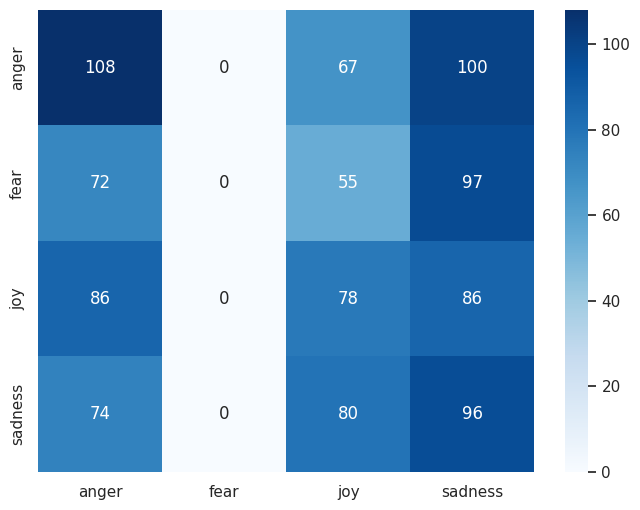

In [76]:
plt.figure(figsize=(8,6))
emotions = {0: 'anger', 1: 'fear', 2: 'joy', 3:'sadness'}
emotions = list(emotions.values())
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)

In [77]:
clr = classification_report(y_true, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.32      0.39      0.35       275
           1       0.00      0.00      0.00       224
           2       0.28      0.31      0.29       250
           3       0.25      0.38      0.31       250

    accuracy                           0.28       999
   macro avg       0.21      0.27      0.24       999
weighted avg       0.22      0.28      0.25       999



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Real-time Emotion and Sentiment Prediction (type 'exit' to quit)
Enter your text: hello are you happy ?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
The predicted emotion is: joy with probability 0.77


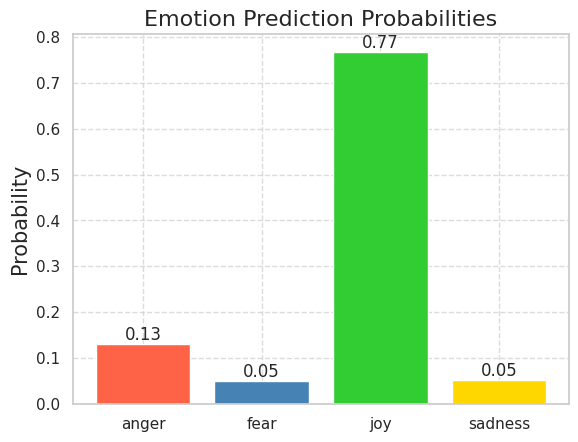

Sentiment analysis: positive (polarity score: 0.80)
Enter your text: i am sad


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
The predicted emotion is: sadness with probability 0.85


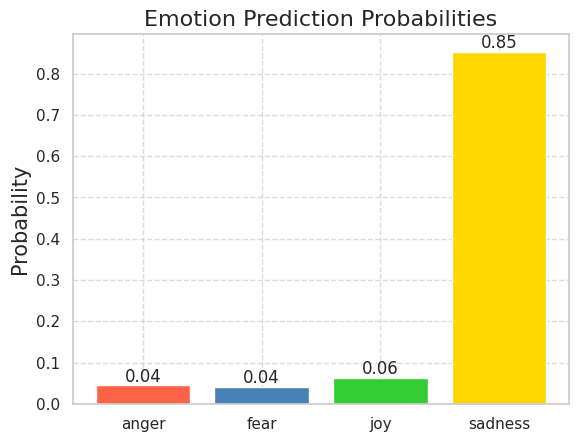

Sentiment analysis: negative (polarity score: -0.50)
Enter your text: I feel so happy and grateful for everything in my life today!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
The predicted emotion is: joy with probability 0.94


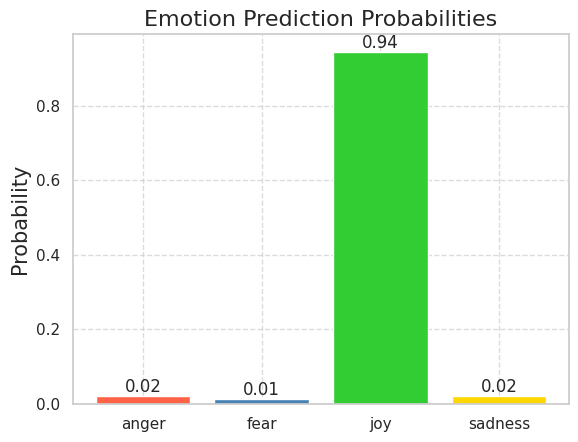

Sentiment analysis: positive (polarity score: 0.80)
Enter your text: I'm scared of what might happen tomorrow; everything feels uncertain.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
The predicted emotion is: fear with probability 0.99


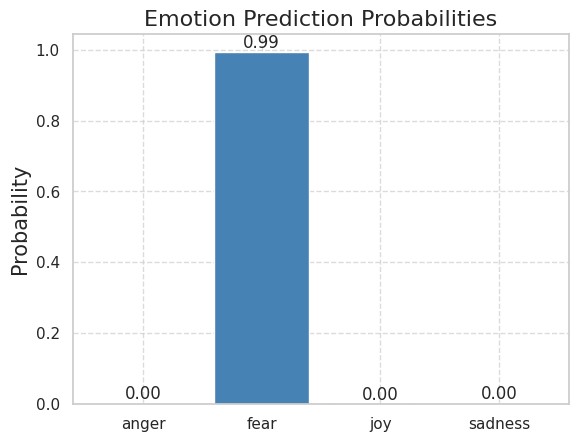

Sentiment analysis: neutral (polarity score: 0.00)
Enter your text: I feel overwhelmed with sadness, but at the same time, I have a sense of excitement about the new opportunities ahead.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
The predicted emotion is: fear with probability 0.82


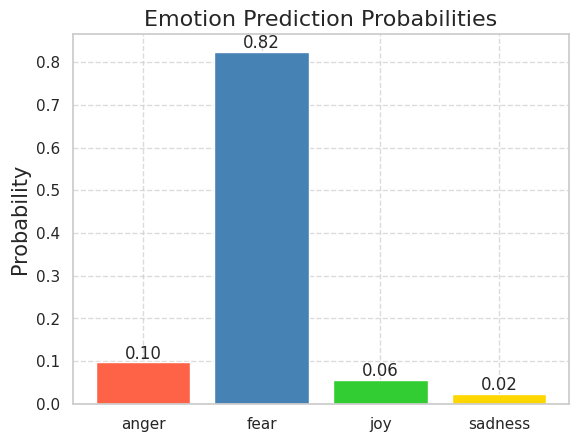

Sentiment analysis: positive (polarity score: 0.07)
Enter your text: I’m angry about the situation, but I’m also hopeful that things will improve soon.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
The predicted emotion is: joy with probability 0.63


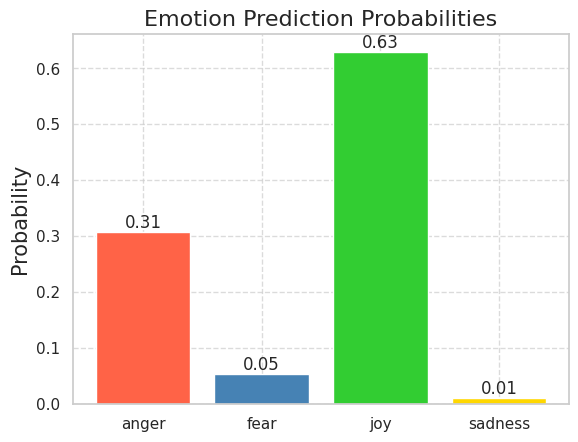

Sentiment analysis: negative (polarity score: -0.50)
Enter your text: exit
Exiting the real-time prediction.


In [78]:
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
from textblob import TextBlob  # For sentiment analysis

# Define the prediction function
def predict(text, model_path, token_path):
    try:
        # Load the model
        model = load_model(model_path)

        # Load the tokenizer
        with open(token_path, 'rb') as f:
            tokenizer = pickle.load(f)

        if not text:
            print("Error: The input text is empty!")
            return

        # Preprocess the input text
        text = preprocess_text(text)
        sequences = tokenizer.texts_to_sequences([text])
        x_new = pad_sequences(sequences, maxlen=50)  # Adjust maxlen as needed

        # Make predictions
        predictions = model.predict([x_new, x_new])

        # Define emotion labels
        emotions = {0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness'}

        # Get the predicted emotions and probabilities
        probs = list(predictions[0])
        labels = list(emotions.values())

        # Find the emotion with the highest probability
        predicted_emotion = labels[probs.index(max(probs))]
        print(f"The predicted emotion is: {predicted_emotion} with probability {max(probs):.2f}")

        # Plot the probabilities with vertical bars
        plt.subplot(1, 1, 1)
        bars = plt.bar(labels, probs, color=['#FF6347', '#4682B4', '#32CD32', '#FFD700'])  # Colors for each emotion

        plt.ylabel('Probability', fontsize=15)

        # Label the bars with the probability values
        ax = plt.gca()
        ax.bar_label(bars, fmt='%.2f')

        # Set title and customize grid lines
        plt.title("Emotion Prediction Probabilities", fontsize=16)
        plt.grid(True, linestyle='--', alpha=0.7)

        # Show the plot
        plt.show()

        # Sentiment Analysis using TextBlob
        sentiment_analysis(text)

    except Exception as e:
        print(f"An error occurred: {e}")

# Text preprocessing function (lowercasing and removing punctuation)
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Sentiment analysis function using TextBlob
def sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity  # Returns a float value between -1 and 1

    if sentiment > 0:
        sentiment_label = 'positive'
    elif sentiment < 0:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    print(f"Sentiment analysis: {sentiment_label} (polarity score: {sentiment:.2f})")

# Real-time prediction function
def real_time_predict(model_path, token_path):
    print("Real-time Emotion and Sentiment Prediction (type 'exit' to quit)")

    while True:
        # Continuously prompt the user for input
        txt = input("Enter your text: ")
        if txt.lower() == 'exit':
            print("Exiting the real-time prediction.")
            break

        # Call the predict function
        predict(txt, model_path, token_path)

# Start real-time prediction
real_time_predict('nlp.h5', 'tokenizer.pkl')


In [79]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [80]:
!git config --global user.name "yesminehe"
!git config --global user.email "yesminesafa@gmail.com"

In [81]:
!git clone https://github.com/Yesminehe/emotion-classification-model.git


Cloning into 'emotion-classification-model'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.


In [82]:
from google.colab import files
uploaded = files.upload()

Saving val.txt to val (1).txt
Saving train.txt to train (1).txt
Saving nlp.h5 to nlp (1).h5
Saving test.txt to test (1).txt


In [85]:
!mv text-clssification-using-cnn.ipynb/content/emotion-classification-model/


mv: missing destination file operand after 'text-clssification-using-cnn.ipynb/content/emotion-classification-model/'
Try 'mv --help' for more information.
